## **MACD HISTOGRAM REVERSAL AND FAVOURABLE EMA TREND**
**Rationale**
1. As both the MACD and EMA are trend-following momentum indicators, combining both could potentially give us stronger evidence of direction and momentum of trends in a stock.

**Aim**
1. We will explore how the 2 indicators can work together to develop a profitable trading strategy.

**Limitations**
1. Operates at 1 hour intervals due to Yahoo Finance limitations.
- If it is a viable strategy, do feel free to use other APIs to convert to shorter time frames, such as 5 or 15 min intervals.

NOTE: This is a very simple strategy designed solely for research purposes and is not intended to be financial advice.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta

from datetime import datetime

**Gather Historical Data for the stock of interest**
- For this notebook, we will analyse the stock: TSLA (Ticker Symbol: TSLA)

In [2]:
def get_historical_data(ticker):
    data = pd.DataFrame()
    stock_data = yf.download(
        ticker,
        start=datetime(2024, 1, 1),
        end=datetime(2024, 10, 1),
        interval='1h',
        prepost=True
    )

    data_ticker = stock_data[['Open', 'High', 'Low', 'Close']]

    data_ticker.columns = [f"{col}" for col in data_ticker.columns]

    data = pd.concat([data, data_ticker], axis=1)
    return data


In [3]:
df = get_historical_data('TSLA')
df.tail(10)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2024-09-30 10:30:00-04:00,259.630005,260.290009,256.809998,259.489990
2024-09-30 11:30:00-04:00,259.700012,261.480011,258.230011,260.718201
2024-09-30 12:30:00-04:00,260.651398,260.899994,258.450012,258.519989
2024-09-30 13:30:00-04:00,258.487701,260.299988,255.770004,256.869904
2024-09-30 14:30:00-04:00,256.820007,259.230011,256.100006,258.720001
2024-09-30 15:30:00-04:00,258.660004,261.869995,258.255188,261.605011
2024-09-30 16:00:00-04:00,261.630000,262.180000,256.855000,261.050000
2024-09-30 17:00:00-04:00,261.050000,271.079400,246.850300,261.070000
2024-09-30 18:00:00-04:00,261.240000,261.300000,261.000000,261.225500


**Calculate the relevant MACD and EMA values**
- For this notebook:
    - MACD: ST EMA Period = 12, LT EMA Period = 26
    - EMA: Period = 20

In [4]:
df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
df[f'EMA20'] = round(df['Close'].ewm(span=20, adjust=False).mean(),2)

df.tail(10)

,Open,High,Low,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,EMA20
Datetime,,,,,,,,
2024-09-30 10:30:00-04:00,259.630005,260.290009,256.809998,259.489990,0.842542,-0.248867,1.091409,259.26
2024-09-30 11:30:00-04:00,259.700012,261.480011,258.230011,260.718201,0.860024,-0.185108,1.045132,259.40
2024-09-30 12:30:00-04:00,260.651398,260.899994,258.450012,258.519989,0.688564,-0.285254,0.973818,259.32
2024-09-30 13:30:00-04:00,258.487701,260.299988,255.770004,256.869904,0.414752,-0.447253,0.862005,259.09
2024-09-30 14:30:00-04:00,256.820007,259.230011,256.100006,258.720001,0.343086,-0.415135,0.758221,259.05
2024-09-30 15:30:00-04:00,258.660004,261.869995,258.255188,261.605011,0.513171,-0.196040,0.709211,259.29
2024-09-30 16:00:00-04:00,261.630000,262.180000,256.855000,261.050000,0.596306,-0.090324,0.686630,259.46
2024-09-30 17:00:00-04:00,261.050000,271.079400,246.850300,261.070000,0.656240,-0.024312,0.680552,259.61
2024-09-30 18:00:00-04:00,261.240000,261.300000,261.000000,261.225500,0.708123,0.022057,0.686066,259.77


**Visualize Stock Price with the Relevant Indicators**

<Figure size 1200x300 with 0 Axes>

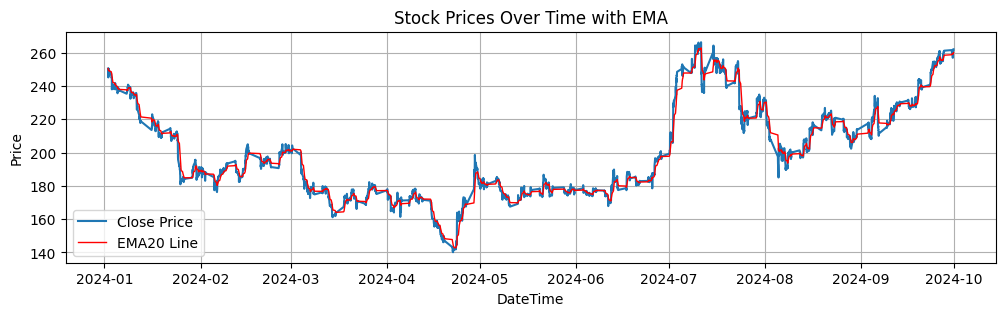

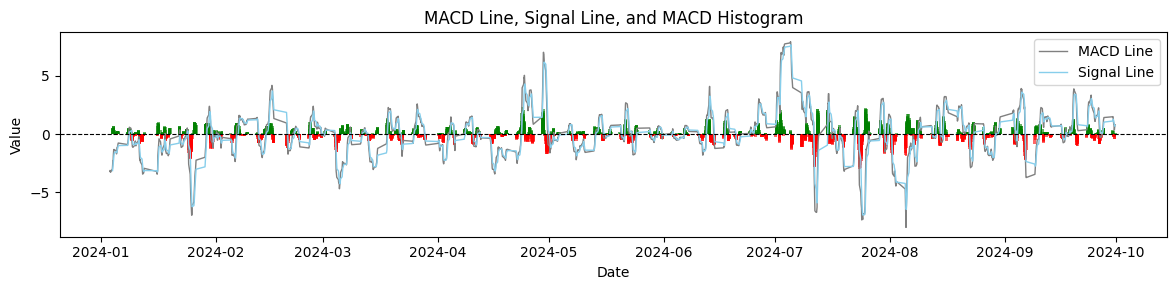

In [5]:
plt.figure(figsize=(12, 3))

plt.figure(figsize=(12, 3))

# Plot Close prices
plt.plot(df.index, df['Close'], label='Close Price', alpha=1)
plt.plot(df.index, df['EMA20'], label='EMA20 Line', color='red', linewidth=1)

plt.title('Stock Prices Over Time with EMA')
plt.xlabel('DateTime')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 3))

# Plot MACD Line and Signal Line
plt.plot(df.index, df['MACD_12_26_9'], label='MACD Line', color='grey', linewidth=1)
plt.plot(df.index, df['MACDs_12_26_9'], label='Signal Line', color='skyblue', linewidth=1)

# Plot MACD Histogram
bars = plt.bar(df.index, df['MACDh_12_26_9'], 
                color=['green' if x > 0 else 'red' for x in df['MACDh_12_26_9']], 
                alpha=0.6)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.title('MACD Line, Signal Line, and MACD Histogram')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


**Remarks**
- As we can see, the EMA line is generally uptrend and MACD Histogram do have quite a few trend reversals. Thus, this provides us with entry and exit opportunities for this particular stock.

**Implement Strategy**
The strategy will be as such:
- Long Trades Only
- Entry Point when MACD Histogram Reversal occurs and EMA is uptrending.
- As with the other notebooks, we will set the average stop loss to be -2% and take-profit to be +6%. Thus, yielding a 1:3 RR Ratio.
- Run back-test to test this strategy.


In [6]:
# Generate signals for each indicator

#MACD_SIGNAL_REVERSAL
def calculate_macd_signal_reversal(df, df_macd_hist):
  prev_signal, curr_signal = 0, 0
  signal_change_list = []
  for i in range(len(df)):
    if df_macd_hist[i] < 0:
      curr_signal = -1
    elif df_macd_hist[i] >= 0:
      curr_signal = 1
    else:
      curr_signal = 0

    if curr_signal != prev_signal:
      if curr_signal > 0 and prev_signal < 0:
        signal_change_list.append(1)
      else:
        signal_change_list.append(0)
    else:
      signal_change_list.append(0)

    prev_signal = curr_signal

  return signal_change_list

#EMA20_SIGNAL_UPTREND
def calculate_ema_signal_uptrend(df, df_ema):
  prev_signal, curr_signal = 1, 1
  signal_list = []

  for i in range(len(df)):
    if df_ema[i] > df_ema[i-1]:
      curr_signal = 1
    elif df_ema[i] < df_ema[i-1]:
      curr_signal = 0
    else:
      curr_signal = prev_signal

    signal_list.append(curr_signal)
    prev_signal = curr_signal

  return signal_list

In [7]:
# Create a combined signal map
signal_map = []

df_macd_hist = df['MACDh_12_26_9'].values
df_ema = df[f'EMA20'].values

macd_signals = calculate_macd_signal_reversal(df, df_macd_hist)
ema_signals = calculate_ema_signal_uptrend(df, df_ema)
signal_map.append(macd_signals)
signal_map.append(ema_signals)

signal_map = list(map(list, zip(*signal_map)))


In [8]:
# Select Rows only if All Conditions are met (i.e. sum(row) == len(strategies))

# PRICE HIT LOGIC
def calculate_price_hit(net_revenue, wins, losses, curr_holdings, high, low):
  temp_holdings = []
  if len(curr_holdings) > 0:
      for holdings in curr_holdings:
        if high > holdings[2]:
          profit = round(holdings[2] - holdings[1],2)
          net_revenue += profit
          wins += 1

        # Do not sell if candle that was bought on have lower Low Price as it could have been due to sharp increase which cause MACD to pivot
        elif low < holdings[0] and holdings[3] == 0:
          loss = round(holdings[0] - holdings[1],2)
          net_revenue += loss
          losses+= 1

        # If at this iteration, no sell has occurred -> put back to holdings
        else:
          holdings[3] = 0
          temp_holdings.append(holdings)

      curr_holdings = temp_holdings

  return net_revenue, wins, losses, curr_holdings

# MAIN FUNCTION LOGIC
def calculate_strategies(df, signal_map, strategies = list):

    #Extract Columns for Faster Computation 
    df_close_prices = df['Close'].values
    df_high_prices = df['High'].values
    df_low_prices = df['Low'].values

    #PRESET
    curr_holdings = []
    total_count, wins, losses, net_revenue = 0, 0, 0, 0

    for i in range(len(df)):

        # If signal conditions are met, call buy function
        if sum(signal_map[i]) == len(strategies):
            total_count += 1
            curr_price = round(df_close_prices[i], 2)
            stop_loss_price = round(curr_price * 0.98, 2)
            profit_price = round(curr_price*1.06, 2)
            curr_holdings.append([stop_loss_price, curr_price, profit_price, 1])

        # If price hit, call price_hit function
        net_revenue, wins, losses, curr_holdings = calculate_price_hit(net_revenue, wins, losses, curr_holdings, df_high_prices[i], df_low_prices[i])

    # Return results
    return [net_revenue, wins, losses, len(curr_holdings)]

In [9]:
result = calculate_strategies(df, signal_map, strategies = ['MACD', 'EMA'])
print(f" Net Revenue: ${round(result[0],2)}, Wins: {result[1]}, Losses: {result[2]}, Open Positions: {result[3]}")

 Net Revenue: $102.03, Wins: 23, Losses: 43, Open Positions: 1


## **FUTURE WORKS**

- Implement optimization techniques to get better parameters for entry and exit points.
- Combine with other indicators to make the strategy even more robust.